# Group 4 EPA Data and Health Effects Modeling 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor

# statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot

# The effects of air particulate on mortality

### Poisson Regression For Mortality Forecasting in Most Polluted CA Counties 

In an effort to model the effects of air pollution on heart disease, cancer, pneumonia, and chronic lower respiratory diseases, we chose to regress the mortality count for each class against the EPA air quality metrics using Poisson Regression. 

The Poisson Regression assumes the mean of a Poisson random variable is a function of explanatory variables [[SOURCE]](https://influentialpoints.com/Training/poisson_regression.htm#:~:text=Assumptions%20of%20Poisson%20regression&text=There%20is%20a%20linear%20relationship,different%20explanatory%20variables%20are%20multiplicative.):
$$
E(Y) = \mu = \lambda = exp(\alpha + \beta_{1}X_{1}+ \dots + \beta_{k}X{k})
$$
$$
\ln Y = \sum(\beta_{j}X_{j})+\epsilon
$$

Poisson Regression is a generalized linear model and is intended to model count data, such as the number of deaths from pneumonia in Kern County, in a given period of time, such as from 1999-2021. The Poisson regression is particularly advantageous for this application since the resulting regression allows us to determine which of our independent variables have a statistically significant effect on our dependent variable, and our coefficients are interpretable. Since the link function for Poisson regression is the logarthm, the model estimates the log of the expected count of deaths for a disease for a given set of air quality features. Thus, to interpret the coefficients we use the following logic: for a one unit change in the predictor variable, the difference in the logs of expected counts is expected to change by the coefficient, given all other variables are held constant. For example, if in a regression for chronic lower respiratory disease the coefficient for `Days NO2` is $.0014$ than we can say that for each additional day with an elevated level of NO2, deaths from chronic lower respiratory disease increase by 0.14%. [[SOURCE](https://quantifyinghealth.com/interpret-poisson-regression-coefficients/)].

import cleaned and merged data from `.csv`

In [8]:
# cancer deaths 1999-2021
can = pd.read_csv('../merged_mortality_epa_data/can.csv')

# pneumonia deaths 1999-2021
pneumonia = pd.read_csv('../merged_mortality_epa_data/pneumonia.csv')

# heart disease deaths 1999-2021
heart_disease = pd.read_csv('../merged_mortality_epa_data/heart_disease.csv')

# chronic lower respiratory disease deaths 1999-2021
cld = pd.read_csv('../merged_mortality_epa_data/cld.csv')

# granger causality test results
granger_df = pd.read_csv('../merged_mortality_epa_data/granger_df.csv')

Starting Poisson Regression Model for Cause:  CLD  and County:  Kern 
Air Quality Stats:  ['Days NO2', 'Good Days'] 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                   23
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -113.36
Date:                Fri, 20 Jan 2023   Deviance:                       47.539
Time:                        11:25:48   Pearson chi2:                     47.9
No. Iterations:                     4   Pseudo R-squ. (CS):             0.8750
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------

,VIF,Features
0,1.172834,Days NO2
1,1.172834,Good Days


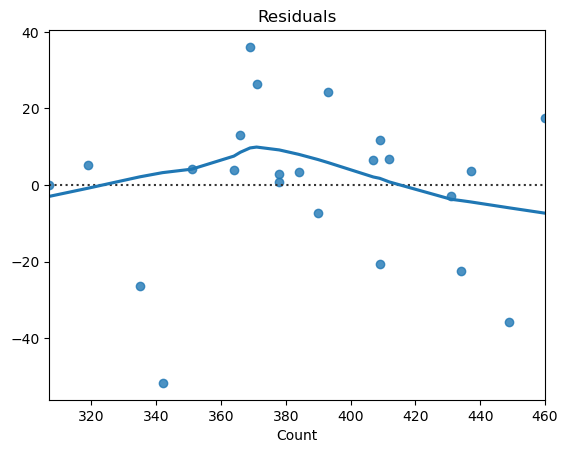

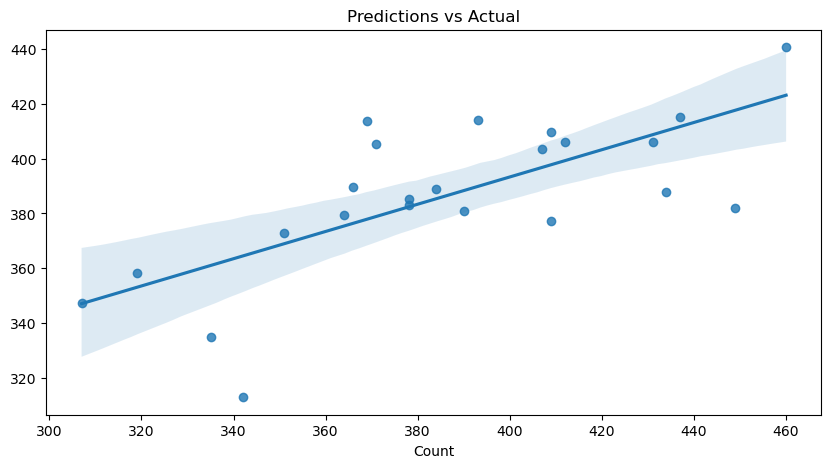

****************************************************************************************************
Starting Poisson Regression Model for Cause:  CLD  and County:  Riverside 
Air Quality Stats:  ['Days NO2', 'Good Days'] 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                   23
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -148.28
Date:                Fri, 20 Jan 2023   Deviance:                       96.213
Time:                        11:25:48   Pearson chi2:                     96.4
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9405
Covariance Type:            nonrobust                            

,VIF,Features
0,1.637907,Days NO2
1,1.637907,Good Days


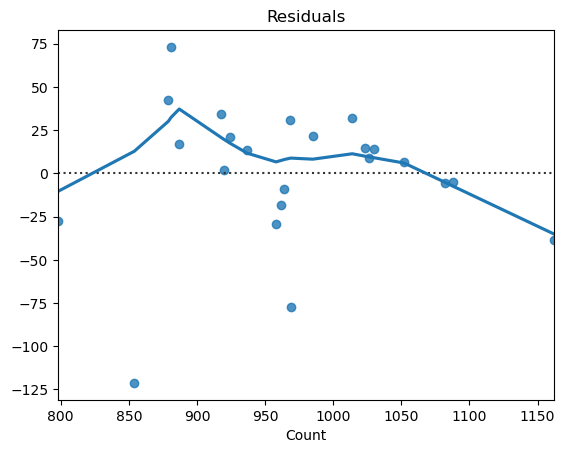

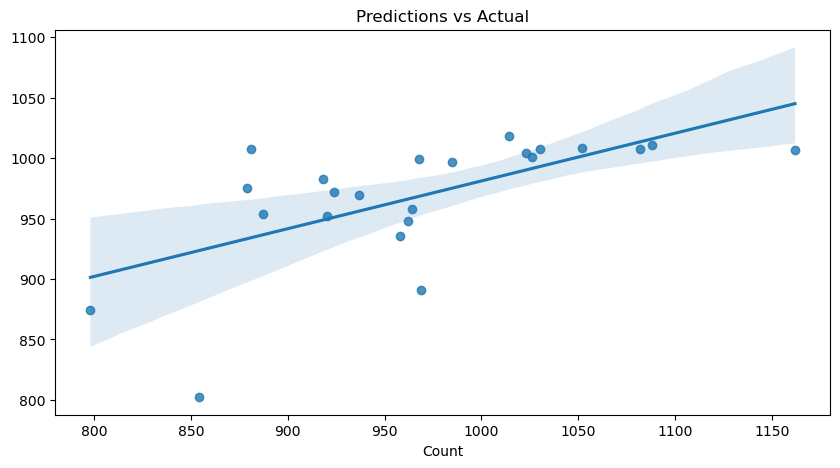

****************************************************************************************************
Starting Poisson Regression Model for Cause:  CLD  and County:  San Bernardino 
Air Quality Stats:  ['Days NO2', 'Good Days'] 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                   23
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -129.69
Date:                Fri, 20 Jan 2023   Deviance:                       62.089
Time:                        11:25:48   Pearson chi2:                     61.4
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7682
Covariance Type:            nonrobust                       

,VIF,Features
0,3.00868,Days NO2
1,3.00868,Good Days


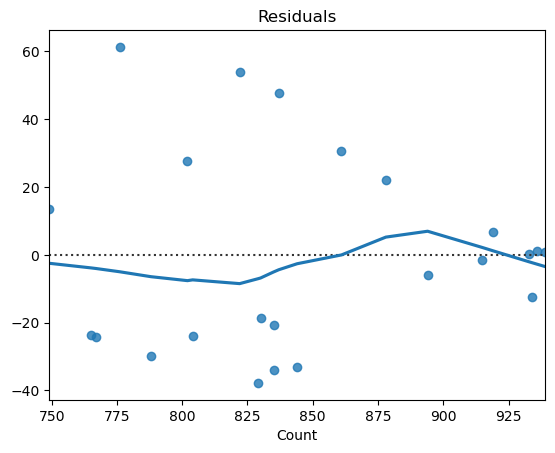

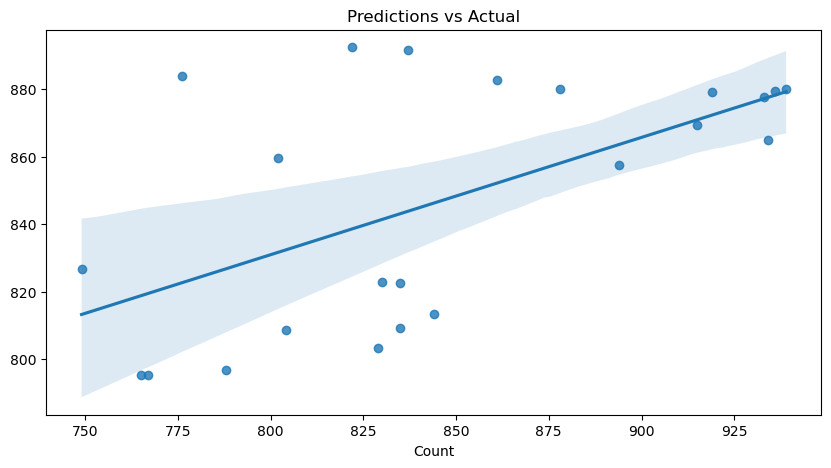

****************************************************************************************************
Starting Poisson Regression Model for Cause:  CLD  and County:  San Diego 
Air Quality Stats:  ['Days NO2', 'Good Days'] 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                   23
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -130.62
Date:                Fri, 20 Jan 2023   Deviance:                       59.236
Time:                        11:25:49   Pearson chi2:                     58.7
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7695
Covariance Type:            nonrobust                            

,VIF,Features
0,2.555813,Days NO2
1,2.555813,Good Days


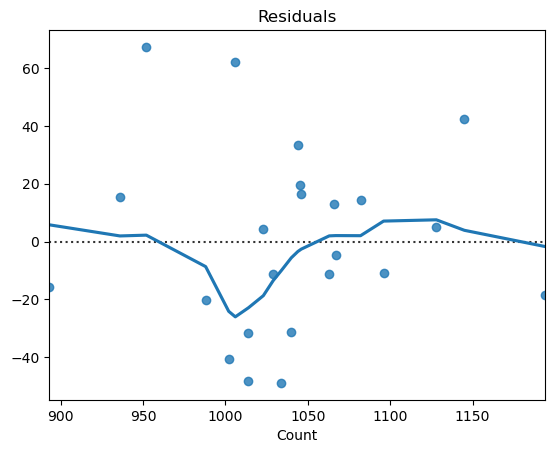

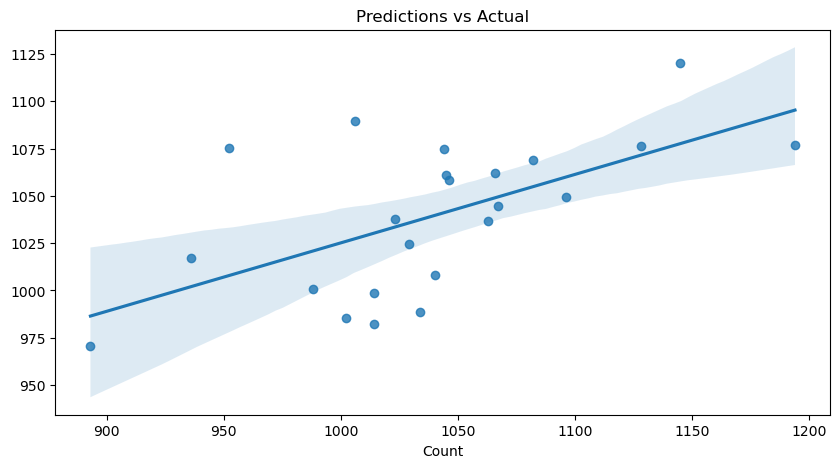

****************************************************************************************************
Starting Poisson Regression Model for Cause:  CAN  and County:  Kern 
Air Quality Stats:  ['Days NO2', 'Good Days'] 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                   23
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -131.32
Date:                Fri, 20 Jan 2023   Deviance:                       59.491
Time:                        11:25:49   Pearson chi2:                     58.7
No. Iterations:                     4   Pseudo R-squ. (CS):             0.7225
Covariance Type:            nonrobust                                 

,VIF,Features
0,1.172834,Days NO2
1,1.172834,Good Days


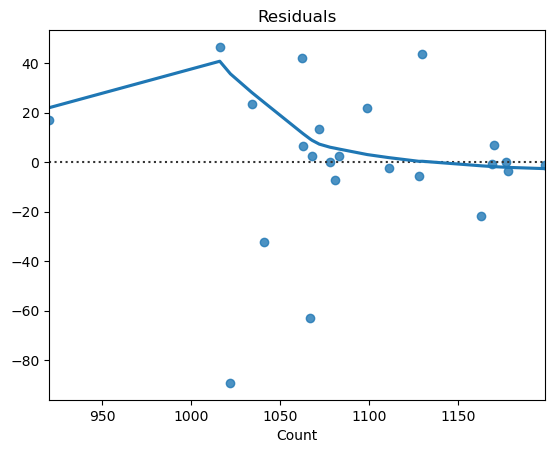

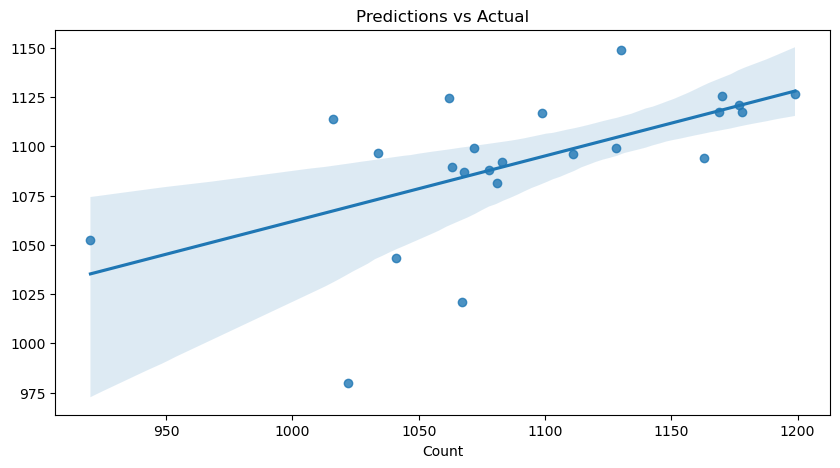

****************************************************************************************************
Starting Poisson Regression Model for Cause:  CAN  and County:  Los Angeles 
Air Quality Stats:  ['Days NO2', 'Good Days'] 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                   23
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -227.80
Date:                Fri, 20 Jan 2023   Deviance:                       193.83
Time:                        11:25:50   Pearson chi2:                     195.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9986
Covariance Type:            nonrobust                          

,VIF,Features
0,2.22112,Days NO2
1,2.22112,Good Days


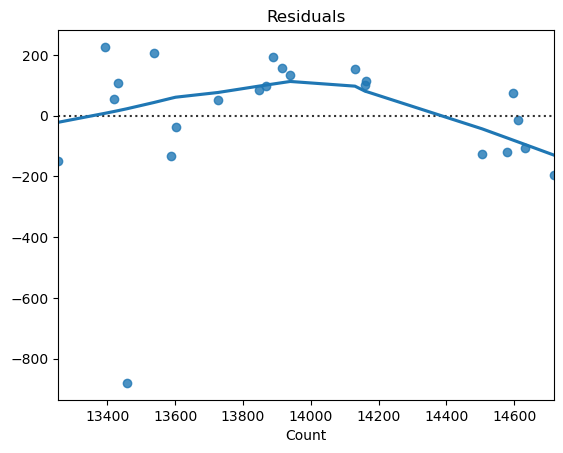

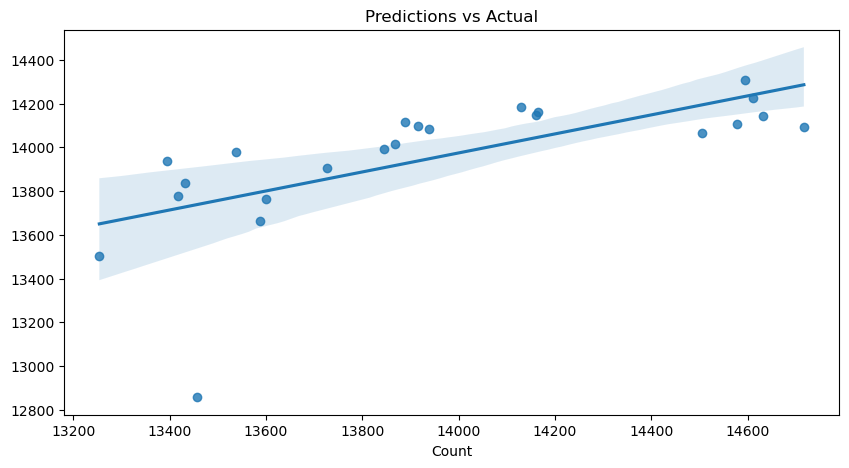

****************************************************************************************************
Starting Poisson Regression Model for Cause:  CAN  and County:  San Bernardino 
Air Quality Stats:  ['Days NO2', 'Good Days'] 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                   23
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -180.60
Date:                Fri, 20 Jan 2023   Deviance:                       136.86
Time:                        11:25:50   Pearson chi2:                     136.
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                       

,VIF,Features
0,3.00868,Days NO2
1,3.00868,Good Days


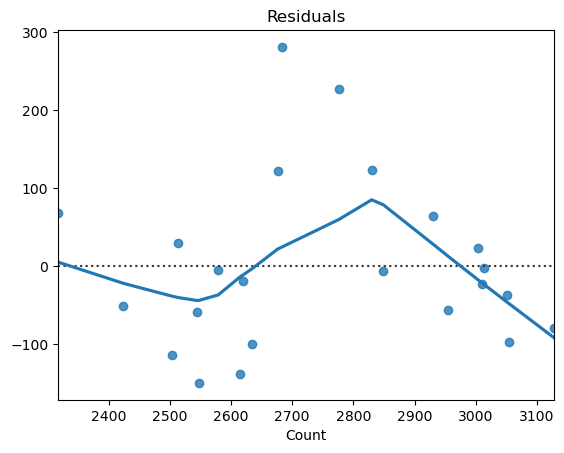

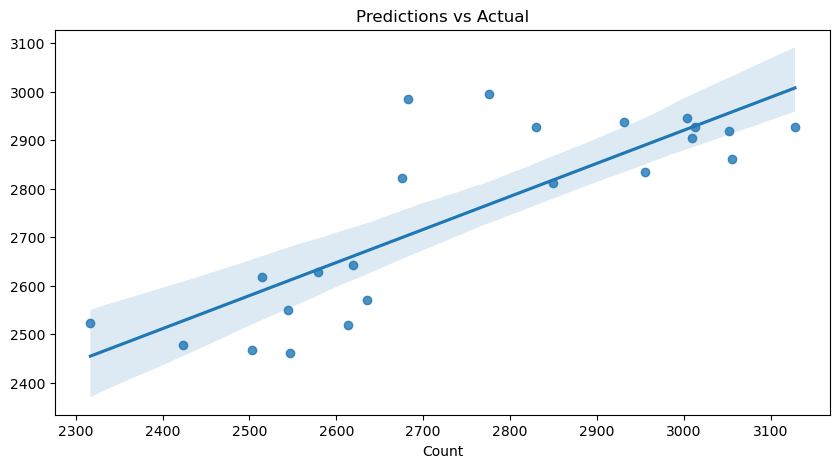

****************************************************************************************************
Starting Poisson Regression Model for Cause:  CAN  and County:  Tulare 
Air Quality Stats:  ['Days NO2', 'Good Days'] 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                   23
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -118.53
Date:                Fri, 20 Jan 2023   Deviance:                       49.051
Time:                        11:25:51   Pearson chi2:                     49.7
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4137
Covariance Type:            nonrobust                               

,VIF,Features
0,1.384322,Days NO2
1,1.384322,Good Days


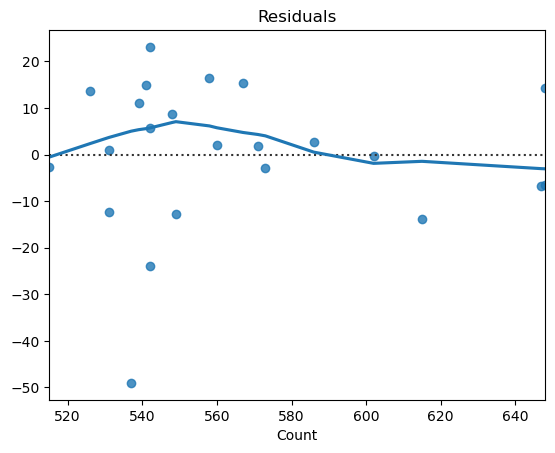

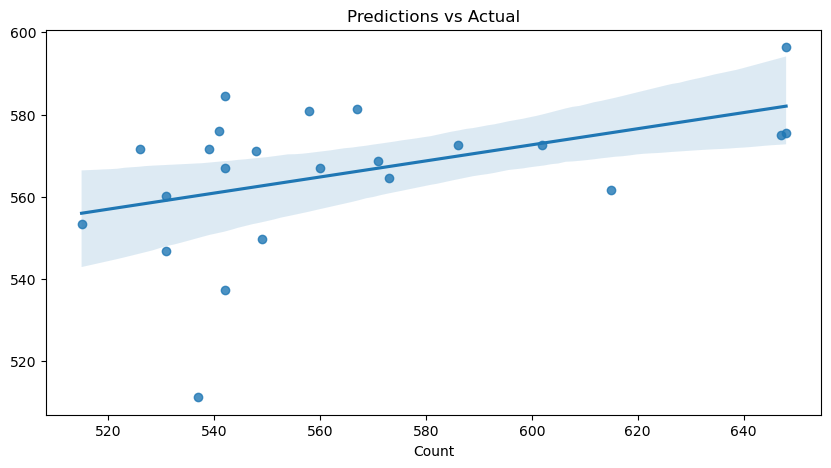

****************************************************************************************************
Starting Poisson Regression Model for Cause:  PNF  and County:  Kern 
Air Quality Stats:  ['Days NO2', 'Good Days'] 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                   23
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -126.45
Date:                Fri, 20 Jan 2023   Deviance:                       98.775
Time:                        11:25:52   Pearson chi2:                     98.0
No. Iterations:                     4   Pseudo R-squ. (CS):             0.8635
Covariance Type:            nonrobust                                 

,VIF,Features
0,1.172834,Days NO2
1,1.172834,Good Days


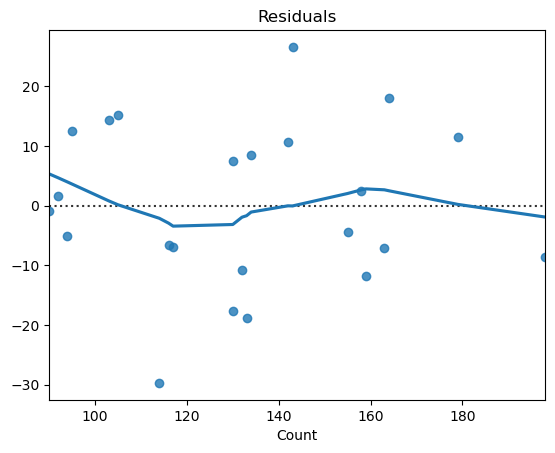

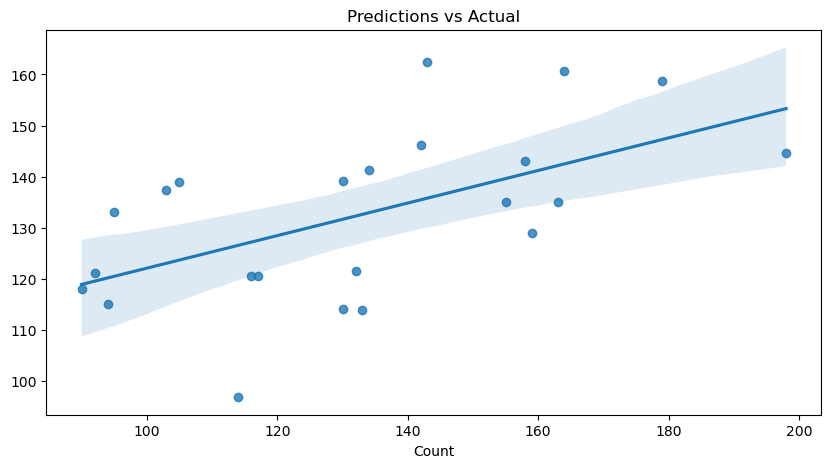

****************************************************************************************************
Starting Poisson Regression Model for Cause:  PNF  and County:  San Bernardino 
Air Quality Stats:  ['Days NO2', 'Good Days'] 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                   23
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -177.12
Date:                Fri, 20 Jan 2023   Deviance:                       183.47
Time:                        11:25:53   Pearson chi2:                     185.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9837
Covariance Type:            nonrobust                       

,VIF,Features
0,3.00868,Days NO2
1,3.00868,Good Days


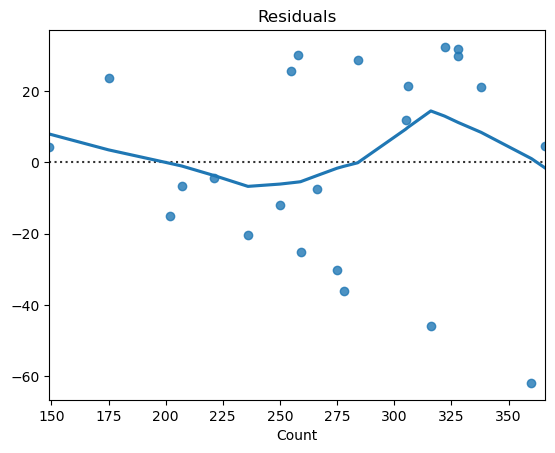

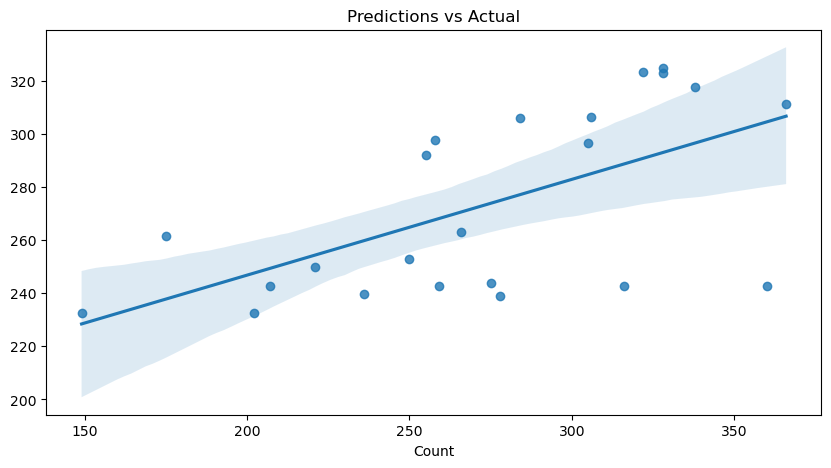

****************************************************************************************************
Starting Poisson Regression Model for Cause:  PNF  and County:  Tulare 
Air Quality Stats:  ['Days NO2', 'Good Days'] 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                   23
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -83.703
Date:                Fri, 20 Jan 2023   Deviance:                       23.902
Time:                        11:25:53   Pearson chi2:                     23.7
No. Iterations:                     4   Pseudo R-squ. (CS):             0.4024
Covariance Type:            nonrobust                               

,VIF,Features
0,1.384322,Days NO2
1,1.384322,Good Days


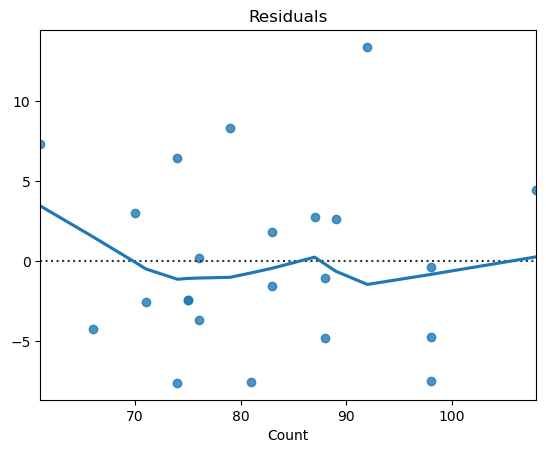

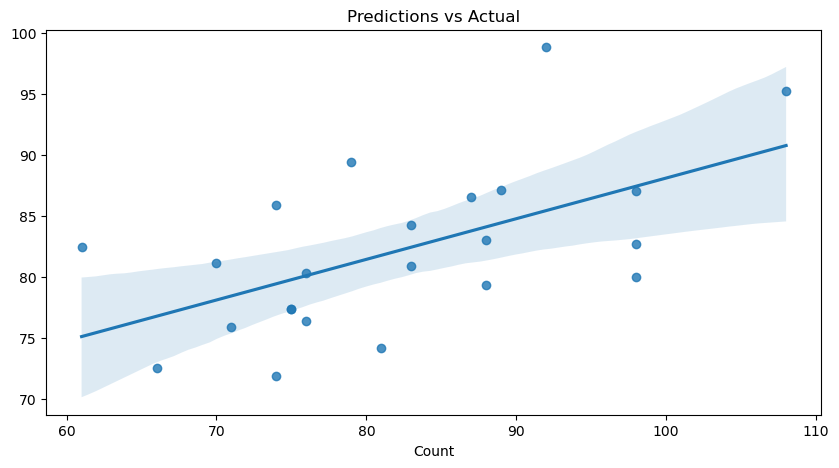

****************************************************************************************************
Starting Poisson Regression Model for Cause:  HTD  and County:  Imperial 
Air Quality Stats:  ['Days NO2', 'Good Days'] 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                   23
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -108.69
Date:                Fri, 20 Jan 2023   Deviance:                       49.128
Time:                        11:25:54   Pearson chi2:                     48.7
No. Iterations:                     4   Pseudo R-squ. (CS):             0.5521
Covariance Type:            nonrobust                             

,VIF,Features
0,4.120507,Days NO2
1,4.120507,Good Days


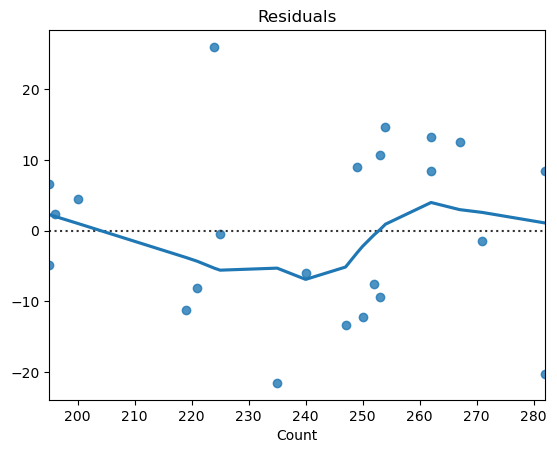

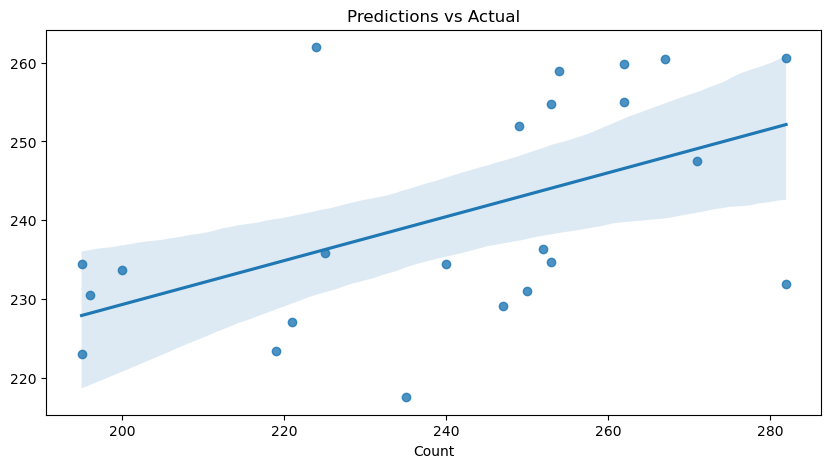

****************************************************************************************************
Starting Poisson Regression Model for Cause:  HTD  and County:  Kern 
Air Quality Stats:  ['Days NO2', 'Good Days'] 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                   23
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -203.74
Date:                Fri, 20 Jan 2023   Deviance:                       197.46
Time:                        11:25:55   Pearson chi2:                     199.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.6802
Covariance Type:            nonrobust                                 

,VIF,Features
0,1.172834,Days NO2
1,1.172834,Good Days


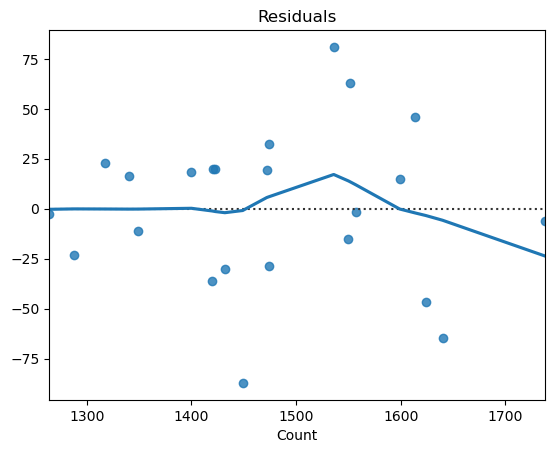

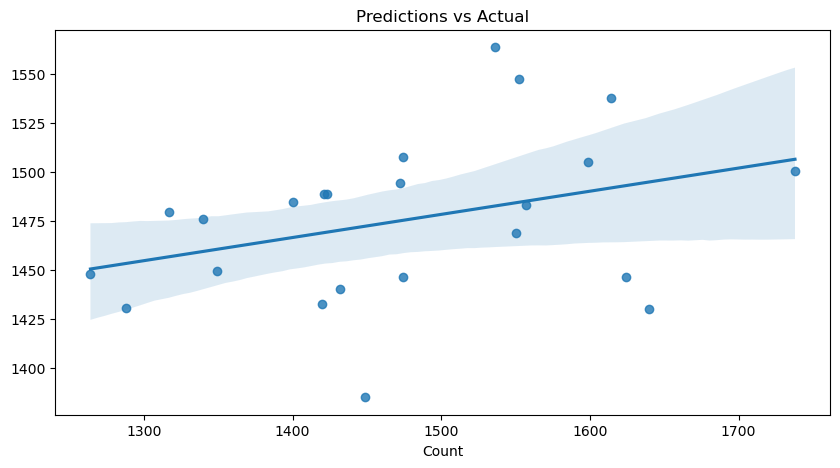

****************************************************************************************************
Starting Poisson Regression Model for Cause:  HTD  and County:  Tulare 
Air Quality Stats:  ['Days NO2', 'Good Days'] 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Count   No. Observations:                   23
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -120.25
Date:                Fri, 20 Jan 2023   Deviance:                       46.157
Time:                        11:25:55   Pearson chi2:                     46.2
No. Iterations:                     3   Pseudo R-squ. (CS):            0.05115
Covariance Type:            nonrobust                               

,VIF,Features
0,1.384322,Days NO2
1,1.384322,Good Days


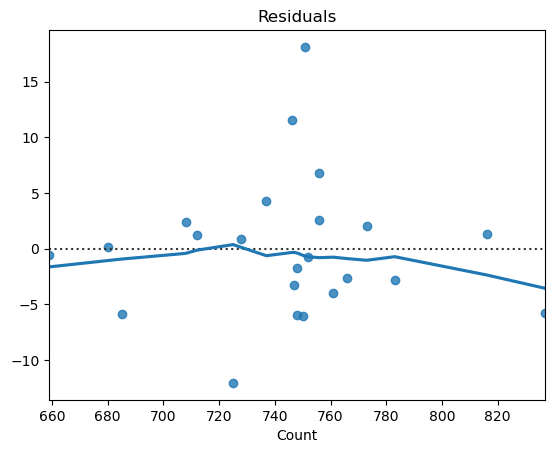

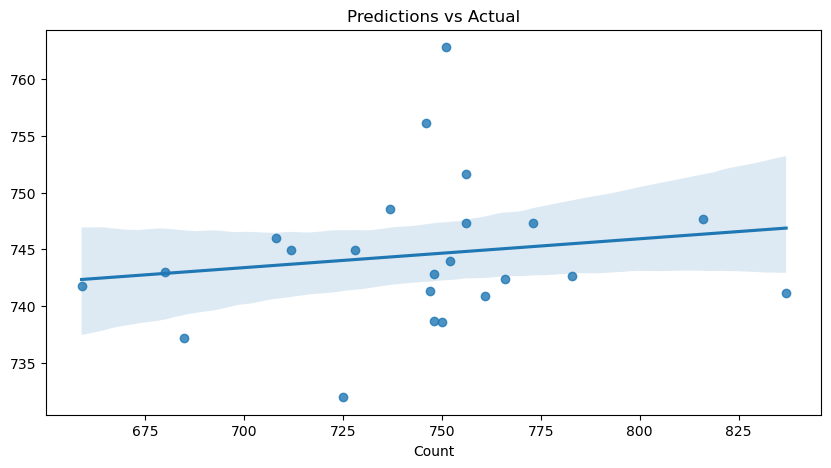

****************************************************************************************************


In [9]:
# poisson regression model
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import LinearRegression
# qq plot
from statsmodels.graphics.gofplots import qqplot

# statsmodels
import statsmodels.api as sm

# poisson regression model
def poisson_regression(df):
    """Function to exhaustively regress over all counties and all air quality metrics 
    found to have a statistically significant relationship for a given cause of death.
    """

    # get cause from df that is passed in and then query granger_df for counties that have that cause
    cause = df['Cause'].unique()[0]
    counties = granger_df.query('Cause == @cause')['County'].unique()
    # print('Starting Poisson Regression Model for Cause: ', cause, ' and Counties: ', counties, '')

    # get data for county
    county_df = df.query(f'County in @counties')

    for county in counties:
        # air quality stats
        air_qual_stats = ['Days NO2','Good Days']

        print('Starting Poisson Regression Model for Cause: ', cause, ' and County: ', county, '')
        print('Air Quality Stats: ', air_qual_stats, '')
        print('')

        # get data for county
        county_df = df.query(f'County == @county')

        # get data for air quality stats
        X = county_df[air_qual_stats]
        y = county_df['Count']

        # add constant
        X_sm = sm.add_constant(X)

        # instantiate model
        model_sm = sm.GLM(y, X_sm, family=sm.families.Poisson())

        # fit model
        model_sm = model_sm.fit()

        # print model summary
        print(model_sm.summary())

        # get predictions
        y_pred = model_sm.predict(X_sm)

        # get vif
        vif = pd.DataFrame()
        vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        vif['Features'] = X.columns

        
        display(vif)

        # sub plots for predictions qq plot and residuals 
        # fig, ax = plt.subplots(1,1, figsize=(15,5))
        # qq plot
        # qqplot(y_pred, line='s', ax=ax[0])
        # ax[0].set_title('QQ Plot')
        # residuals
        sns.residplot(x= y, y = y_pred, lowess=True)
        plt.title('Residuals')
        
        plt.show()

        # plot predictions vs actuali
        plt.figure(figsize=(10,5))
        sns.regplot(x=y, y=y_pred, lowess=False)
        plt.title('Predictions vs Actual')
        plt.show()

        print('*'*100)


for df in [cld, can, pneumonia, heart_disease]:

    poisson_regression(df)



# Model Interpretation

The above function fits a Poisson Regression for each of California counties with the worst air quality, plots the predicted counts and renders a residual plot for easy diagnosis of linear assumptions. 

**Poisson Regression Assumptions and MultiCollinearity**

In order for valid interpretation of the results of a Poisson regression to be made, a number of assumptions must be met:

1. Linear relationship between the log of the rate and equal increment changes in the predictor variable.

2. The response variable follows a Poisson distribution - the mean and variance of the variable are equal. 

3. Errors are independently distributed. 

We initially tried to use all of the air quality features that the granger causality tests found significant relationships for, but this resulted in severe multicollinearity (as assessed by the variance inflation factor tables) resulting in clearly spurious relationships between the coefficients. Since our goal was never to predict deaths but to gain deeper quantitative insight into what might be causing them, we instead focused on interpretability and chose to model with the number of days with a good air quality index and the number of days with a large amount of fine particulate matter, since this was the most common statistically significant variable in the Granger Causality tests performed in the EDA notebooks. 

**Results**

The results show marginal success but also much noise. It intuitively stands to reason that increasing the number of good air quality days can only help health outcomes however in multiple models we see a positive coefficient for good days indicating that an increase in good air quality days *increases* the amount of deaths from a particular ailment. 

However, there are other models where the results are as expected and the p-values for the coefficients suggest statistical significance, for the following counties we find a statistically significant relationship between fine particulate matter and mortality:

1. Kern County shows a statistically significant relationship between days with high levels of PM 2.5 and deaths from cancer, heart disease and and cancer. 

2. Los Angeles County shows a statistically significant relationship between days with high levels of PM 2.5 and deaths from cancer. 

3. Tulare Countyy shows a statistically significant relationship between days with high levels of PM 2.5 and deaths from cancer. 

4. San Diego shows a statistically significant relationship between days with high levels of PM 2.5 and deaths from chronic lower respiratory disease. 

In all of the above models the regression coefficients indicated a negative relationship between good air quality days and a positive relationship between days with elevated levels of fine particulate matter, with p-values less than $.05$ for all coefficients. 

While these results are in no way conclusive, when considered in light of the additional time series analysis done in the EDA notebooks with granger causality tests, the results suggest that a reduction in the level of atmospheric fine particulate matter as well as a reduction of NO2 can result in better health outcomes. 